# Big Mini Project (Part A)

In [1]:
# All neccesary imports
import numpy as np
rng = np.random.default_rng()
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math

## Entry
A general function for playing the string game using n strings and k turns. Uses my idea to define each string as a string of zeros. Records the length of each unique loop made and on what turn it was made. This is just using my mathematical definition and this code is quite slow so I hope to optimise it for specific simulation. It is still important to have this so I can check my more optimised simulations later. 

In [2]:
# function to simulate one string game for n strings and a specific number of turns
# note that all strings will have formed loops after n turns
# returns the list of loop sizes for each unique loop and a list of when each loop was made
def string_game(n,turns):
    strings_list = [ [0] for _ in range(n) ]
    loops_list = []
    loop_made = []
    k = n
    for i in range(turns):
        # if no more strings left stop
        if k == 0:
            break
        # need this as rng.integers doesn't work if the high point is 0
        if k == 1:
            choice1 = 0
            choice2 = 0
        else:
            choice1, choice2 = rng.integers(0,k,2)
        # the length of the first selected string
        len1 = len(strings_list[choice1])
        # if the ends of the same string chosen, loop formed
        # record the length of this loop
        # record the turn on which the loop was made
        if choice1 == choice2:
            loops_list.append(len1)
            loop_made.append(i+1)
        # if two different strings chosen, connect them
        else:
            for j in range(len1):
                strings_list[choice2].append(0)
        # remove the string that has either turned into a loop or been added to another string already
        strings_list.pop(choice1)        
        # record how many strings left
        k = k-1
    return loops_list, loop_made

## Attack 2.1
Now this code can be optimised for the first part of my attack: looking into $X_n$. I simply adjust the previous code to stop when the first loop is made and return the value of which turn it was made on. Since I then hope to simulate this, it returns the turn minus 1 so I can use it as an index in my simulation function which returns the whole distribution of $X_n$ for a givem number of simulations.

In [3]:
# function that returns the turn-1 on which the 1st loop is a made in a game of n strings
# optimised to stop after it gets first loop
def string_game_1stloop(n):
    strings_list = [ [0] for _ in range(n) ]
    k = n
    for i in range(n):
        # need this as rng.integers doesn't work if the high point is 0
        if k == 1:
            return n-1
        else:
            choice1, choice2 = rng.integers(0,k,2)
            len1 = len(strings_list[choice1])
        if choice1 == choice2:
            return i
        # if two different strings chosen, connect them
        else:
            for j in range(len1):
                strings_list[choice2].append(0)
        strings_list.pop(choice1)        
        # record how many strings left
        k = k-1

# function to simulate a number of string games using n strings until 1st loop
# returns array of distribution of when 1st loop was reached
def simulation_1stloop(n,sims):
    res = np.zeros(n)
    for i in range(sims):
        indx = string_game_1stloop(n)
        res[indx] += 1
    return res / sims

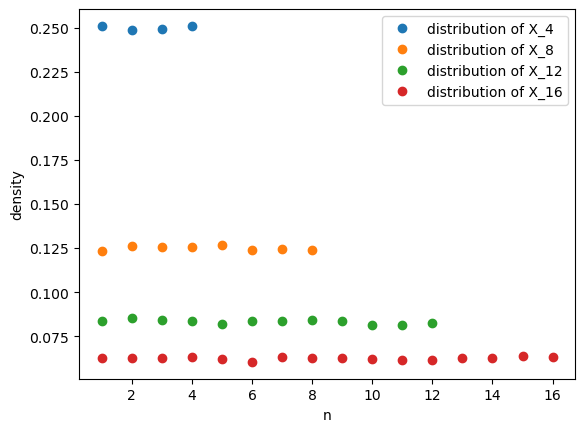

In [4]:
# 100,000 simulations for X_4,X_8,X_12,X_16
sims = 100000
for i in range(4):
    n = (i+1)*4
    dist_1stloop = simulation_1stloop(n,sims)
    x_1stloop = np.linspace(1,n,n)
    plt.plot(x_1stloop,dist_1stloop,'o',label=f"distribution of X_{n}")
plt.legend()
plt.xlabel("n")
plt.ylabel("density")
plt.show()

## Attack 2.2
As discussed in the rubric, I can optimise my code for counting the number of loops made. Since the chance of making a loop from n strings is uniform, I can simply usse rng.integers to pick when this loop is made, then just keep track of how many strings are left after each loop is made. Hence I can optimise my code by a lot in this way. In fact, I can optimise my string_game_1stloop function in the same way but this would trivially give me a uniform distribution.

In [5]:
# function to return number of loops made using bowl of n strings after n number of turns
# returns number of loops made
def string_game_loopsnum(n):
    k = 0
    loops = 0
    while k <= n:
        turn_of_loop = rng.integers(1, n - k + 1)
        k += turn_of_loop
        if k > n:
            break
        if k > n - 1:
            loops += 1
            break
        loops += 1
    return loops

# function to simulate previous function and return density of each number of loops reached
def simulation_loopsnum(n,sims):
    res = np.zeros(n)
    for i in range(sims):
        indx = string_game_loopsnum(n) - 1
        res[indx] += 1
    return res/sims

In [6]:
# simulate the average number of loops made for the first 20 Y_n using 100,000 simulations
sims = 100000
avg_loopnum = np.zeros(20)
for i in range(20):
    n = i+1
    res = simulation_loopsnum(n,sims)
    x = np.linspace(1,n,n)
    avg_loopnum[i] = np.average(x,weights=res)

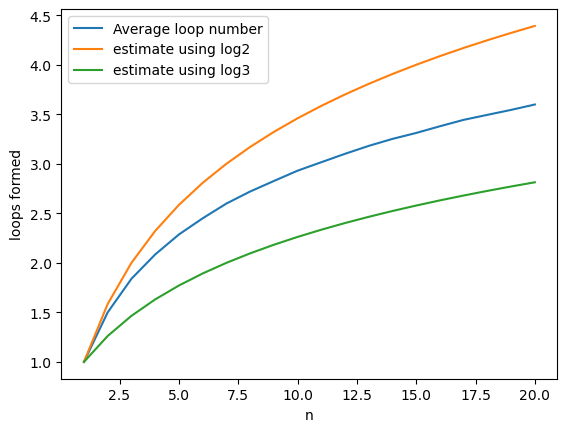

In [7]:
x_avg_loops = np.linspace(1,20,20)
estimate1 = np.log2(x+1)
estimate2 = np.log(x+2)/np.log(3)
plt.plot(x_avg_loops,avg_loopnum,label="Average loop number")
plt.plot(x_avg_loops,estimate1,label="estimate using log2")
plt.plot(x_avg_loops,estimate2,label="estimate using log3")
plt.legend()
plt.xlabel("n")
plt.ylabel("loops formed")
plt.show()

To find the optimal log base of $E(Y_n)$, I can simply write a function to optimise it. I have that it is between 2 and 3 and so my first guess will be 2.5.

In [8]:
def optimize_coefficient(x, y, initial_guess ,lb, ub):
    
    model.fit(x, initial_guess ** y)
    r_sq_initial = model.score(x, initial_guess ** y)
    
    model.fit(x, lb ** y)
    r_sq_lower = model.score(x, lb ** y)
    
    model.fit(x, ub ** y)
    r_sq_upper = model.score(x, ub ** y)
    
    new_guess_lower = ( lb + initial_guess ) / 2
    new_guess_upper = ( ub + initial_guess ) / 2
    
    model.fit(x, new_guess_lower ** y)
    r_sq_new_lower = model.score(x, new_guess_lower ** y)
    
    model.fit(x, new_guess_upper ** y)
    r_sq_new_upper = model.score(x, new_guess_upper ** y)
    
    if r_sq_new_lower > r_sq_new_upper:
        return x, y, new_guess_lower , lb, initial_guess
    else:
        return x, y, new_guess_upper , initial_guess, ub

x_model = x_avg_loops
x_model = x_model.reshape((-1, 1))
y = avg_loopnum
initial_guess = 2.5
lb = 2
ub = 3
model = LinearRegression()
for _ in range(20):
    x, y, initial_guess ,lb, ub = optimize_coefficient(x_model, y, initial_guess ,lb, ub)

best_guess = initial_guess
model.fit(x_model, best_guess ** y)
r_sq = model.score(x_model, best_guess ** y)
print("The optimal base of the logarithm is ", best_guess)
print("which gives a correlation coefficient of ", r_sq)

The optimal base of the logarithm is  2.7097668647766113
which gives a correlation coefficient of  0.9999615600687266


In [9]:
# evaluating my proposed model at n=3
def proposed_model(n):
    sqrt_e = np.exp(1/2)
    return np.log( (sqrt_e - 1)*n + (2 - sqrt_e) ) + 1

print(proposed_model(3))

1.8317965657511863


## Attack 2.4

In [10]:
# Function to generate the first row_num rows of the beta triangle from the rubric
def beta_triangle(row_num):
    triangle = np.zeros((row_num,row_num))
    for i in range(row_num):
        triangle[i,0] = math.factorial(i)
    for i in range(1,row_num):
        for j in range(i+1):
            triangle[i,j] = triangle[i-1,j-1] + i*triangle[i-1,j]
    return triangle

# Function to print the first row_num rows of the beta triangle
# row_num has to be greater or equal to the num_rows of the actual beta triangle inputted
def print_beta_triangle(beta, row_num):
    for i in range(row_num):
        for j in range(0, row_num-i):
            print(' ', end=' ') 
        for j in range(i+1):
            s = int(beta[i,j])
            print('{:^4}'.format(s), end='')
        print('')

# Function to print the first row_num rows of the alpha triangle
# row_num has to be greater or equal to the num_rows of the actual beta triangle inputted
def print_alpha_triangle(beta, row_num):
    for i in range(row_num):
        for j in range(0, row_num-i):
            print('   ', end='') 
        for j in range(i+1):
            s = round( beta[i,j] / math.factorial(i+1) , 3)
            #print(' ', s, sep=' ', end='')
            print('{:^8}'.format(s), end='')
        print('') 

In [11]:
# generate the beta triangle
# it is larger than neccessary for use later
beta = beta_triangle(16) 
# print the first 6 rows of the beta triangle as per rubric
print_beta_triangle(beta,6)

             1  
           1   1  
         2   3   1  
       6   11  6   1  
     24  50  35  10  1  
  120 274 225  85  15  1  


In [12]:
# print first 6 rows of the alpha triangle
print_alpha_triangle(beta,6)

                    1.0   
                 0.5     0.5   
             0.333    0.5    0.167  
           0.25   0.458    0.25   0.042  
        0.2    0.417   0.292   0.083   0.008  
    0.167   0.381   0.312   0.118   0.021   0.001  


In [13]:
## Function to return a diagonal of the beta matrix
def diagonal_beta(beta,diagonal):
    size = len(beta)
    size = size - diagonal
    res = np.zeros(size)
    for i in range(size):
        res[i] = beta[diagonal+i,i]
    return res

## Function to calculate coefficients of polynomial of desired degree
def coefficients(deg,start,diagonal):
    size = deg + 1
    mat = np.zeros((size,size))
    values = diagonal[:size]
    for i in range(size):
        power = start + i
        for j in range(size):
            mat[i,j] = power**(deg-j)
    return np.linalg.solve(mat,values)

## Function to return the next value the polynomial gives
def test_coefficients(deg,start,coeffs):
    power = start + deg + 1
    res = 0
    for i in range(deg+1):
        res += ( power**(deg-i) ) * coeffs[i]
    return res

In [14]:
# function to test polynomial model of degree n for modelling the k^th diagonal
# prints the predicted next value and actual next value
# returns coefficients of the polynomial
def polynomial_model(diagonal_num,deg,beta):
    diagonal_n = diagonal_beta(beta,diagonal_num)
    coeffs = coefficients(deg, diagonal_num, diagonal_n)
    test = test_coefficients(deg, diagonal_num, coeffs)
    print("expected to get ", diagonal_n[deg+1])
    print("actually got ", test)
    
    return coeffs

First we look for a polynomial for the 2nd diagonal (the diagonal of ones we treat as the 0th diagonal).

In [15]:
diag2_deg3 = polynomial_model(2,3,beta)

expected to get  175.0
actually got  172.00000000000003


So a polynomial of degree 3 fails.

In [16]:
diag2_deg4 = polynomial_model(2,4,beta)

expected to get  322.0
actually got  322.0


Polynomial of degree 4 appears to work. Let us see the coefficients.

In [17]:
print(diag2_deg4)

[ 1.25000000e-01  8.33333333e-02 -1.25000000e-01 -8.33333333e-02
 -8.53483950e-15]


In [18]:
# 0.125 looks like needs to be multiplied by 8 to be whole and 0.08333 looks like needs to
# be multiplied by 3
print(diag2_deg4*8*3)

[ 3.00000000e+00  2.00000000e+00 -3.00000000e+00 -2.00000000e+00
 -2.04836148e-13]


Appears to be the polynomial $(3x^4+2x^3-3x^2-2x)/24$. We can test this against all the values in the diagonal.

In [19]:
diagonal2 = diagonal_beta(beta,2)
x_diagonal2 = np.linspace(2,15,14)
polynomial_diag2 = ( 3*(x_diagonal2**4)+2*(x_diagonal2**3)-3*(x_diagonal2**2)-2*x_diagonal2 ) / 24
testing2 = np.abs( diagonal2 - polynomial_diag2 )
print(np.max(testing2))

0.0


So the polynomial appears to be correct. Next we look for a polynomial for the 3rd diagonal.

In [20]:
diag3_deg5 = polynomial_model(3,5,beta)

expected to get  9450.0
actually got  9435.000000000004


So a polynomial of degree 5 fails.

In [21]:
diag3_deg6 = polynomial_model(3,6,beta)

expected to get  18150.0
actually got  18150.00000000001


Polynomial of degree 6 appears to work. Let us see the coefficients.

In [22]:
print(diag3_deg6)

[ 2.08333333e-02 -2.08333333e-02 -6.25000000e-02  2.08333333e-02
  4.16666667e-02 -8.06142972e-11  6.73483977e-11]


In [23]:
# last time the divisor was 24 so worth trying to multiply by 24
print(diag3_deg6*24)

[ 5.00000000e-01 -5.00000000e-01 -1.50000000e+00  5.00000000e-01
  1.00000000e+00 -1.93474313e-09  1.61636154e-09]


In [24]:
# looks like it has an extra factor of 1/2
print(diag3_deg6*24*2)

[ 1.00000000e+00 -1.00000000e+00 -3.00000000e+00  1.00000000e+00
  2.00000000e+00 -3.86948627e-09  3.23272309e-09]


Appears to be the polynomial $(x^6-x^5-3x^4+x^3+2x^2)/48$. We can test this against all the values in the diagonal.

In [25]:
diagonal3 = diagonal_beta(beta,3)
x_diagonal3 = np.linspace(3,15,13)
polynomial_diag3 = ( (x_diagonal3**6)-(x_diagonal3**5)-3*(x_diagonal3**4)+(x_diagonal3**3)
                    +2*(x_diagonal3**2) ) / 48
testing3 = np.abs( diagonal3 - polynomial_diag3 )
print(np.max(testing3))

0.0


So the polynomial appears to be correct. Next we look for a polynomial for the 4th diagonal.

In [26]:
diag4_deg7 = polynomial_model(4,7,beta)

expected to get  749463.0
actually got  749358.0000000295


So a polynomial of degree 7 fails.

In [27]:
diag4_deg8 = polynomial_model(4,8,beta)

expected to get  1474473.0
actually got  1474473.0000000019


Polynomial of degree 8 appears to work. Let us see the coefficients.

In [28]:
print(diag4_deg8)

[ 2.60416667e-03 -1.04166667e-02 -1.73611110e-03  3.33333332e-02
 -4.34027621e-03 -3.12500091e-02  3.47225469e-03  8.33326826e-03
  5.60354627e-08]


In [29]:
# as before multiply by previous factor
print(diag4_deg8*48)

[ 1.25000000e-01 -5.00000000e-01 -8.33333328e-02  1.59999999e+00
 -2.08333258e-01 -1.50000044e+00  1.66668225e-01  3.99996876e-01
  2.68970221e-06]


In [30]:
# 0.125 looks like needs to be multiplied by 8 to be whole and 0.08333 looks like needs to
# be multiplied by 3
print(diag4_deg8*48*8*3)

[ 3.00000000e+00 -1.20000000e+01 -1.99999999e+00  3.83999998e+01
 -4.99999819e+00 -3.60000105e+01  4.00003740e+00  9.59992503e+00
  6.45528530e-05]


In [31]:
# -3.6 looks like it needs to be multiplied by 5
print(diag4_deg8*48*8*3*5)

[ 1.50000000e+01 -6.00000000e+01 -9.99999993e+00  1.91999999e+02
 -2.49999910e+01 -1.80000052e+02  2.00001870e+01  4.79996251e+01
  3.22764265e-04]


Appears to be the polynomial $(15x^8-60x^7-10x^6+120x^5-25x^4-180x^3+20x^2+48x)/5760$. We can test this against all the values in the diagonal.

In [32]:
diagonal4 = diagonal_beta(beta,4)
x_diagonal4 = np.linspace(4,15,12)
polynomial_diag4 = ( 15*(x_diagonal4**8)-60*(x_diagonal4**7)-10*(x_diagonal4**6)+192*(x_diagonal4**5)
                    -25*(x_diagonal4**4)-180*(x_diagonal4**3)+20*(x_diagonal4**2)+48*(x_diagonal4) ) / 5760
testing4 = np.abs( diagonal4 - polynomial_diag4 )
print(np.max(testing4))

0.0


So the polynomial appears to be correct.
## Attack 2.5

In [33]:
sims = 1000000
avg_loopnum = np.zeros(5)
for i in range(5):
    n = i+1
    res = simulation_loopsnum(n,sims)
    x = np.linspace(1,n,n)
    avg_loopnum[i] = np.average(x,weights=res)

for i in range(4):
    avg_loopnum[4-i] -= avg_loopnum[3-i]
print(avg_loopnum)

[1.       0.499235 0.334513 0.249232 0.200309]


In [34]:
# code to check my conjecture
sims = 10000
avg_loopnum50 = np.zeros(50)
for i in range(50):
    n = i+1
    res = simulation_loopsnum(n,sims)
    x = np.linspace(1,n,n)
    avg_loopnum50[i] = np.average(x,weights=res)

# generate first 50 partial sums of the harmonic sum    
first_50_harmonic = np.zeros(50)
first_50_harmonic[0] = 1
for i in range(49):
    first_50_harmonic[i+1] = first_50_harmonic[i] + 1/(i+2)

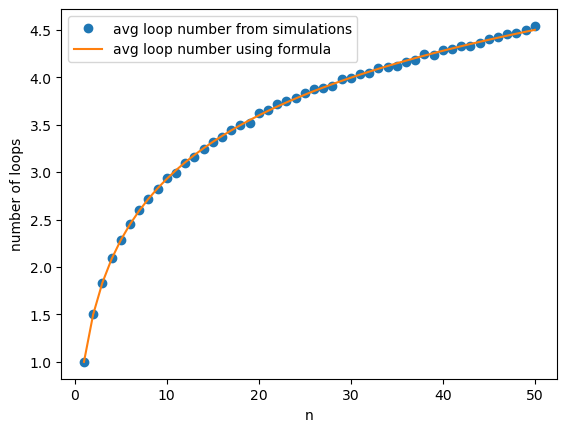

In [35]:
x_avg_loops50 = np.linspace(1,50,50)

plt.plot(x_avg_loops50,avg_loopnum50,'o',label="avg loop number from simulations")
plt.plot(x_avg_loops50,first_50_harmonic,label="avg loop number using formula")
plt.legend()
plt.xlabel("n")
plt.ylabel("number of loops")
plt.show()

## Attack 2.6

In [36]:
# function to adapt string_game_loopsnum to give the distribution
# of how many loops are there on which turn
def string_game_loopsnum_dist(n):
    k = 0
    loops_dist = np.zeros(n)
    while k <= n:
        turn_of_loop = rng.integers(1, n - k + 1)
        k += turn_of_loop
        if k > n:
            break
        if k > n - 1:
            loops_dist[n-1] += 1
            break
        loops_dist[k-1::] += 1
    return loops_dist

# code to simulate the previous function
def sim_loopsnum_dist(n,sims):
    loops_dist = np.zeros(n)
    for i in range(sims):
        loops_dist += string_game_loopsnum_dist(n)
    return loops_dist/sims

In [37]:
# code to check my conjecture for X_20
loops_dist20 = sim_loopsnum_dist(20,10000)

my_formula20 = np.zeros(20)
my_formula20[0] = 1/20
for i in range(19):
    my_formula20[i+1] = my_formula20[i] + 1/(19-i)

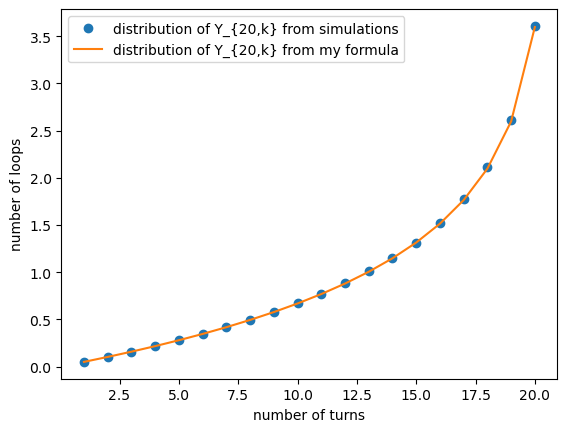

In [38]:
x_loops_dist20 = np.linspace(1,20,20)
plt.plot(x_loops_dist20,loops_dist20,'o',label="distribution of Y_{20,k} from simulations")
plt.plot(x_loops_dist20,my_formula20,label="distribution of Y_{20,k} from my formula")
plt.legend()
plt.xlabel("number of turns")
plt.ylabel("number of loops")
plt.show()

## Attack 2.7

In [39]:
# function to simulate one string game for n strings and a specific number of turns
# note that all strings will have formed loops after n turns
# returns the list of loop sizes for each unique loop and a list of when each loop was made
def string_game_looplength(n,turns):
    strings_list = [ [0] for _ in range(n) ]
    loops_list = []
    k = n
    for i in range(turns):
        # if no more strings left stop
        if k == 0:
            break
        # need this as rng.integers doesn't work if the high point is 0
        if k == 1:
            choice1 = 0
            choice2 = 0
        else:
            choice1, choice2 = rng.integers(0,k,2)
        # the length of the first selected string
        len1 = len(strings_list[choice1])
        # if the ends of the same string chosen, loop formed
        # record the length of this loop
        # record the turn on which the loop was made
        if choice1 == choice2:
            loops_list.append(len1)
        # if two different strings chosen, connect them
        else:
            for j in range(len1):
                strings_list[choice2].append(0)
        # remove the string that has either turned into a loop or been added to another string already
        strings_list.pop(choice1)        
        # record how many strings left
        k = k-1
    return loops_list

# function to simulate previous function
def sim_avg_loop_length(n,turns,sims):
    res = 0
    for i in range(sims):
        loops_list = string_game_looplength(n,turns)
        res += np.average(loops_list)
    return res/sims

In [40]:
sims = 1000
avg_loop_length = np.zeros(50)
for i in range(50):
    avg_loop_length[i] = sim_avg_loop_length(i+1,i+1,sims)

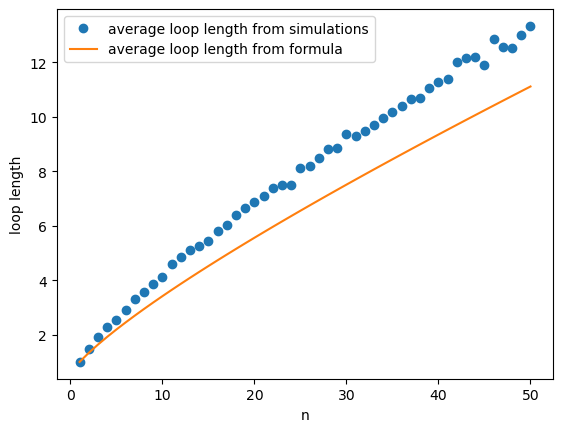

In [41]:
x_loop_length = np.linspace(1,50,50)
y_myformula = x_loop_length / first_50_harmonic
plt.plot(x_loop_length,avg_loop_length,'o',label="average loop length from simulations")
plt.plot(x_loop_length,y_myformula,label="average loop length from formula")
plt.xlabel("n")
plt.ylabel("loop length")
plt.legend()
plt.show()